<h3>
Khai báo các thư viện cần thiết
</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from private_module import visualize_orbit

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

Đọc dữ liệu từ file "measData.csv"

In [12]:
df = pd.read_csv("data/measData.csv")
df_ground_truth = pd.read_csv('data\groundtruthData.csv') # Lấy dữ liệu trong thực tế để đối chiếu

print("Các trường thuộc tính của dữ liệu measData:")
print(df.columns)

print()
print("Các trường thuộc tính của dữ liệu groundtruthData:")
print(df_ground_truth.columns)

print()
print("Năm dòng đầu tiên của bộ dữ liệu measData:")
print(df.head())

print()
print("Năm dòng đầu tiên của bộ dữ liệu groundtruthData:")
print(df_ground_truth.head())

Các trường thuộc tính của dữ liệu measData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)'], dtype='object')

Các trường thuộc tính của dữ liệu groundtruthData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)', 'Speed (m/s)',
       'Heading (rad)'],
      dtype='object')

Năm dòng đầu tiên của bộ dữ liệu measData:
   timeSeries  Azimuth (rad)    Range (m)
0           0      -2.619192  200076.6746
1          10      -2.622475  198853.7752
2          20      -2.622916  197974.2480
3          30      -2.633978  196907.8388
4          40      -2.622791  195972.3070

Năm dòng đầu tiên của bộ dữ liệu groundtruthData:
   timeSeries  Azimuth (rad)    Range (m)  Speed (m/s)  Heading (rad)
0           0      -2.619852  200000.0000          120       1.049056
1          10      -2.622887  198963.9228          120       1.049056
2          20      -2.625954  197929.6974          120       1.049056
3          30      -2.629053  196897.3532          120       1.049056
4          40      -2.6321

<h4>
    Nội dung của bộ dữ liệu: 
</h4>

Bộ dữ liệu “measData.csv” chứa thông tin quỹ đạo của một mục tiêu phát hiện bởi Radar với các giá trị trong các thuộc tính có ý nghĩa như sau:
+ Cột "Time Series": Cho biết thời điểm của mục tiêu tại vị trí đấy (giây - gốc thời gian là 0s), cột dữ liệu này đơn điệu tăng, tỉ lệ thuận gấp 10 với chỉ số của từng hàng dữ liệu
+ Cột “Azimuth”: giá trị phương vị (góc hình học, gốc tại 3h, tăng ngược chiều kim đồng hồ). Đơn vị: radian
+ Cột “Range”: giá trị cự ly (khoảng cách đến tâm đài Radar). Đơn vị: mét

Nội dung của 3 cột thuộc tính được minh hoạ trong ảnh dưới đây: 
    
<center>
      <img src="./img_for_notebook/polar_coordinate.jpg" alt="Ảnh minh hoạ 3 thuộc tính">
</center>

<h3>
    Thực hiện thống kê mô tả để hiểu hai bộ dữ liệu
</h3>

<h4>
    Đối với bộ dữ liệu từ radar (measData)
</h4>

Kiểm tra sự tồn tại của giá trị null trong bộ dữ liệu

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timeSeries     500 non-null    int64  
 1   Azimuth (rad)  500 non-null    float64
 2   Range (m)      500 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


--> Không có sự tồn tại giá trị null trong các cột dữ liệu

Trước tiên, ta sẽ cùng thử xem qua các tham số đặc trưng, và các biểu đồ hộp của thuộc tính

In [14]:
df.describe()

,timeSeries,Azimuth (rad),Range (m)
count,500.000000,500.000000,500.000000
mean,2495.000000,0.338989,130133.787614
std,1444.818328,1.966283,49302.402205
min,0.000000,-3.135104,53291.338400
25%,1247.500000,-2.633359,93822.983782
50%,2495.000000,1.190902,127094.953800
75%,3742.500000,1.387258,159423.774875
max,4990.000000,3.146498,252131.570500


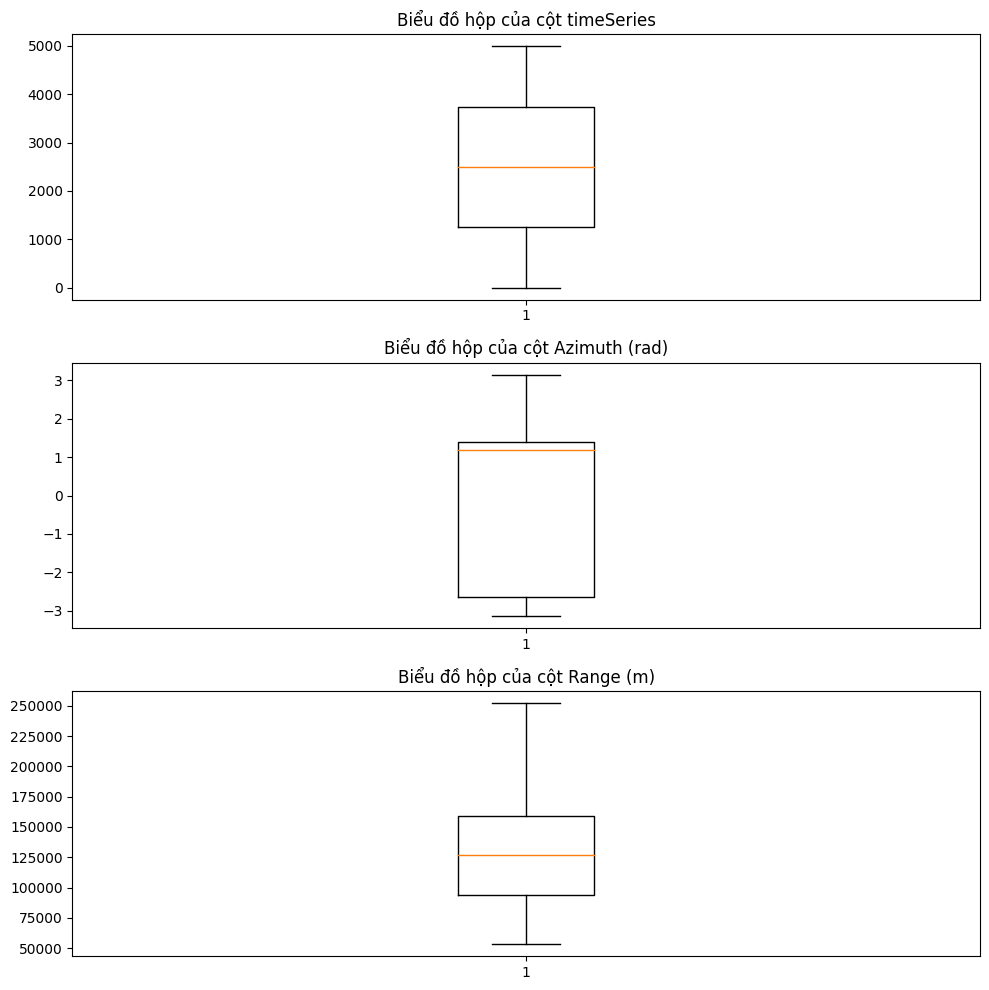

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))


# Iterate through the subplots and plot some data
for i, ax in enumerate(axes.flat):
    ax.boxplot(df[df.columns[i]])
    ax.set_title(f"Biểu đồ hộp của cột {df.columns[i]}")


plt.tight_layout()  # Làm cho các chữ không bị dính vào nhau
plt.show()

Tiếp theo, ta sẽ thể hiện tần suất đồ của các giá trị trong các cột thuộc tính kết hợp với biểu đồ đường (Do các cột thuộc tính có giá trị theo chuỗi thời gian nên trục hoành có thể xem là sự biểu hiện của thuộc tính thời gian)

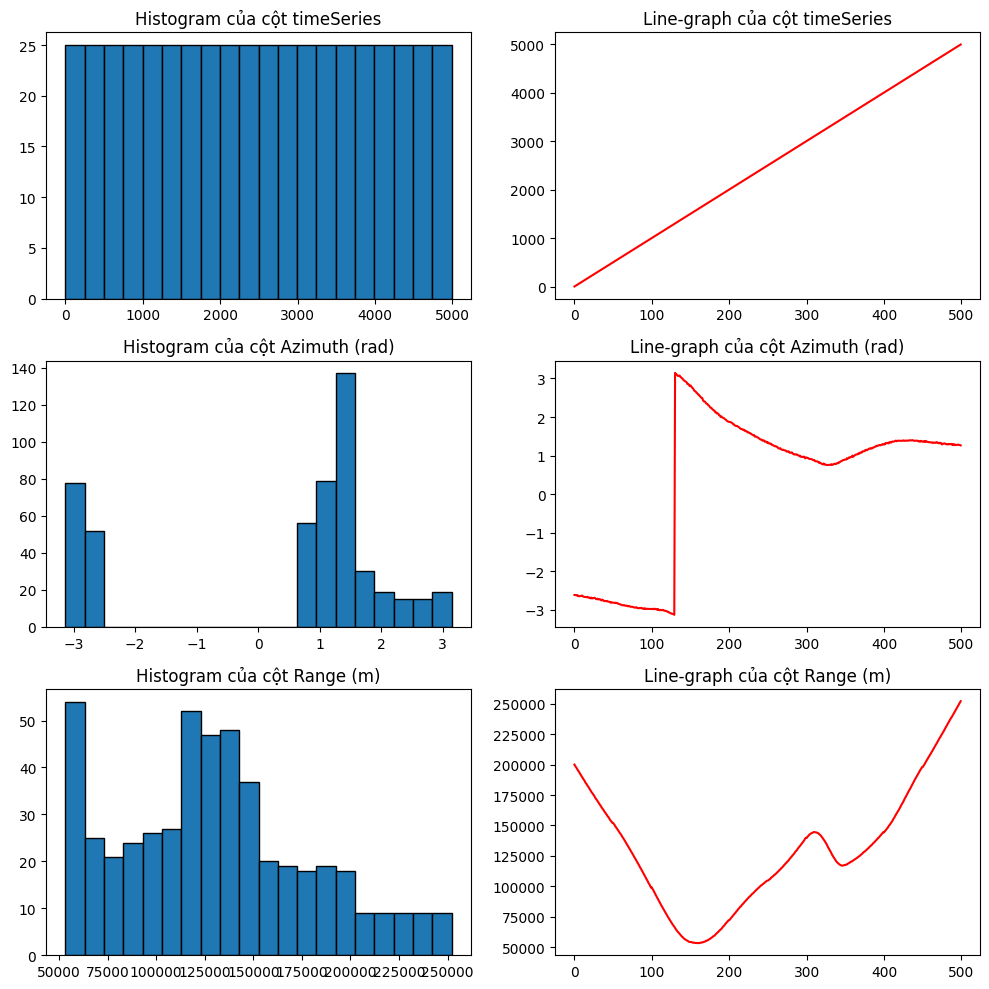

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))


# Iterate through the subplots and plot some data
for i in range(3):
    for j in range(2):
        if j % 2 == 0:
            ax[i][j].hist(df[df.columns[i]], bins=20, edgecolor = "black")
            ax[i][j].set_title(f"Histogram của cột {df.columns[i]}")
        else:
            ax[i][j].plot(df[df.columns[i]], color = "r")
            ax[i][j].set_title(f"Line-graph của cột {df.columns[i]}")

    
plt.tight_layout()  # Làm cho các chữ không bị dính vào nhau

plt.show()


**Nhận xét:**
+ Dữ liệu timeSerie tỉ lệ tuyến tính với chỉ số của hàng khi quan sát trên đồ thị (với tỷ lệ cụ thể là 10).
    <br>
+ Trong biểu đồ đường của cột dữ liệu Azimuth (Góc phương vị), có sự gián đoạn dữ liệu tại một điểm có giá trị trên trục hoành vào khoảng (1200s, 1400s). Điều này có thể giải thích là do trong khoảng thời gian đấy, mục tiêu đang di chuyển từ góc phần tư thứ III sang đến góc phần tư thứ II (trên trục toạ độ Descartes, với gốc toạ độ là vị trí Radar), để thể hiện sự liên tục, ta có thể thay đổi các giá trị góc phương vị âm sang các giá trị dương tương ứng.
    <br>
+ Cùng với đó, ở biểu đồ đường của cột Azimuth và cột Range không có tính tuần hoàn, đặc biệt cột Range có xu hướng nghịch biến ở thời điểm đầu, sau đó đồng biến ở thời gian ước tính (1400s - 1600s), sau đó có sự nghịch biến nhẹ trước khi tiếp tục đồng biến, nên có thể nhận định rằng: Mục tiêu không di chuyển quanh Radar mà đang di chuyển từ xa lại gần và tiếp tục di chuyển ra xa.

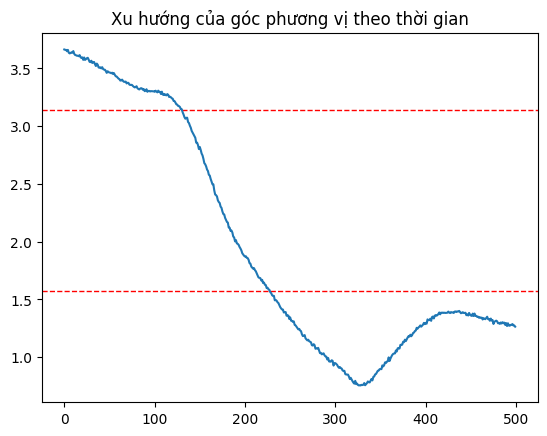

In [17]:
# Thay đổi các giá trị góc phương vị âm để đồng nhất và dễ quan sát trên đồ thị

df.loc[df['Azimuth (rad)'] < 0, 'Azimuth (rad)'] = 2 * np.pi + df['Azimuth (rad)']


plt.axhline(y=np.pi, color='red', linewidth=1, linestyle = "--")
plt.axhline(y=np.pi / 2, color='red', linewidth=1, linestyle = "--")

plt.title("Xu hướng của góc phương vị theo thời gian")
plt.plot(df['Azimuth (rad)'])
plt.show()

<h4>
    Trực quan hoá quỹ đạo của mục tiêu
</h4>

Quỹ đạo của mục tiêu được thể hiện trên mặt phẳng 2D

Trước tiên, ta thêm vào dữ liệu các cột thuộc tính về các giá trị trục hoành (x-axis) và trục tung (y-axis) sau khi đã biết hai thông tin về góc phương vị (Azimuth) và khoảng cách (Range). Hai giá trị này này được tính bằng công thức sau:
<center>
    $x = \cos(\alpha) \cdot d$
    <br>
    $y = \sin(\alpha) \cdot d$
    
    
</center>
<p style="padding-left: 8cm;">
    Trong đó $\alpha$: Góc phương vị; $d$: Khoảng cách (range)
</p>

Để thuận tiện cho việc trực quan, ta cũng sẽ giảm thuộc tính Range đi 1000 lần (về đơn vị km)

In [18]:
df['Range (m)'] = df['Range (m)'] / 1000

df['x-axis'] = np.cos(df['Azimuth (rad)']) * df['Range (m)']
df['y-axis'] = np.sin(df['Azimuth (rad)']) * df['Range (m)']

# Đổi lại tên thuộc tính cho phù hợp
df = df.rename(columns={'Range (m)': 'Range (km)'})

df.head()

,timeSeries,Azimuth (rad),Range (km),x-axis,y-axis
0,0,3.663993,200.076675,-173.391253,-99.830602
1,10,3.660711,198.853775,-172.656196,-98.654255
2,20,3.660269,197.974248,-171.935899,-98.141987
3,30,3.649208,196.907839,-172.079002,-95.715799
4,40,3.660394,195.972307,-170.185084,-97.170893


Lưu lại dữ liệu trên

In [19]:
df.to_csv('data/measData_ver2.csv', index=False)

Trực quan hoá quỹ đạo của mục tiêu trên trục toạ độ Descartes:


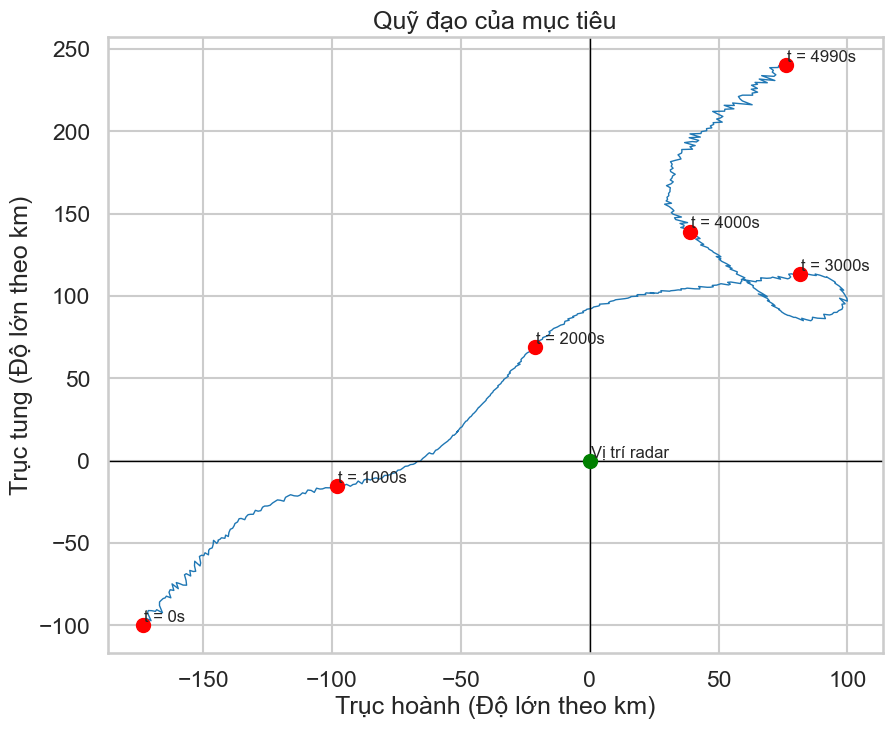

In [20]:
visualize_orbit.plot_orbit(df)

### Sử dụng thuật toán Moving Average để xử lý dữ liệu nhiễu

Thuật toán Moving Average có nhiều biến thể để phục vụ xử lý dữ liệu nhiễu, trong có có 3 thuật toán mà em sẽ trình bày dưới đây:
- Simple Moving Average (SMA)
- Weighted Moving Average (WMA)
- Expoential Moving Average (EMA)

In [2]:
df = pd.read_csv("data/measData.csv")
df_ground_truth = pd.read_csv('data\groundtruthData.csv') # Lấy dữ liệu trong thực tế để đối chiếu

print("Các trường thuộc tính của dữ liệu measData:")
print(df.columns)

print()
print("Các trường thuộc tính của dữ liệu groundtruthData:")
print(df_ground_truth.columns)

print()
print("Năm dòng đầu tiên của bộ dữ liệu measData:")
print(df.head())

print()
print("Năm dòng đầu tiên của bộ dữ liệu groundtruthData:")
print(df_ground_truth.head())

Các trường thuộc tính của dữ liệu measData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)'], dtype='object')

Các trường thuộc tính của dữ liệu groundtruthData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)', 'Speed (m/s)',
       'Heading (rad)'],
      dtype='object')

Năm dòng đầu tiên của bộ dữ liệu measData:
   timeSeries  Azimuth (rad)    Range (m)
0           0      -2.619192  200076.6746
1          10      -2.622475  198853.7752
2          20      -2.622916  197974.2480
3          30      -2.633978  196907.8388
4          40      -2.622791  195972.3070

Năm dòng đầu tiên của bộ dữ liệu groundtruthData:
   timeSeries  Azimuth (rad)    Range (m)  Speed (m/s)  Heading (rad)
0           0      -2.619852  200000.0000          120       1.049056
1          10      -2.622887  198963.9228          120       1.049056
2          20      -2.625954  197929.6974          120       1.049056
3          30      -2.629053  196897.3532          120       1.049056
4          40      -2.6321

In [3]:
# Khai báo module đã xây dựng riêng
from private_module.moving_average import simple_moving_average, weighted_moving_average, exponential_moving_average, find_best_window


azimuth_raw = np.array(df['Azimuth (rad)'].tolist())
range_raw = np.array(df['Range (m)'].tolist()) 



azimuth_real = np.array(df_ground_truth['Azimuth (rad)'].tolist())
range_real = np.array(df_ground_truth['Range (m)'].tolist())

In [4]:
# Compute the MSE

mse_range = mean_squared_error(range_real, range_raw)
mse_azimuth = mean_squared_error(azimuth_real, azimuth_raw)

print('MSE of range:', mse_range)
print('MSE of azimuth:', mse_azimuth)
print('----------------')
#Compute the RMSE

print('RMSE of range:', np.sqrt(mse_range))
print('RMSE of azimuth:', np.sqrt(mse_azimuth))

MSE of range: 9473.947804178108
MSE of azimuth: 7.06542877155871e-05
----------------
RMSE of range: 97.33420675270389
RMSE of azimuth: 0.008405610490356255


In [5]:
# Compute the MAE

mae_range = mean_absolute_error(range_real, range_raw)
mae_azimuth = mean_absolute_error(azimuth_real, azimuth_raw)

print('MAE of range:', mae_range)
print('MAE of azimuth:', mae_azimuth)
print('----------------')


MAE of range: 78.73473837999992
MAE of azimuth: 0.006780912856000002
----------------


In [6]:
# Compute the R_Squared error

r2_range = r2_score(range_real, range_raw)
r2_azimuth = r2_score(azimuth_real, azimuth_raw)

print('R2 of range:', r2_range)
print('R2 of azimuth:', r2_azimuth)
print('----------------')


R2 of range: 0.9999960952656611
R2 of azimuth: 0.9999816910250159
----------------


Trước khi tiến hành vào việc xử lý dữ liệu, ta sẽ biểu diễn dữ liệu trong một khoảng nhỏ để thấy được sự biến động trong dữ liệu.

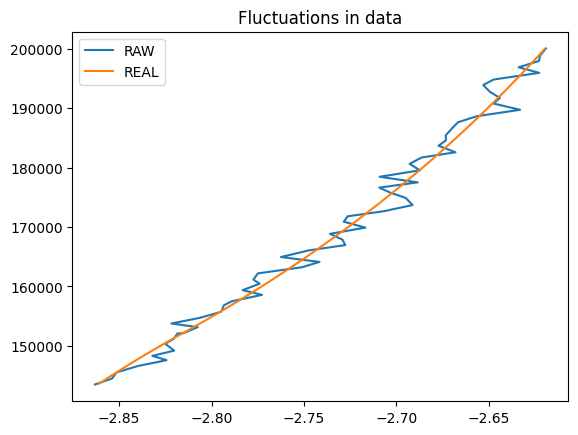

In [7]:
plt.plot(azimuth_raw[:60], range_raw[:60], label='RAW')
plt.plot(azimuth_real[:60], range_real[:60], label='REAL')
plt.legend()
plt.title('Fluctuations in data')
plt.show()

Mọi người có thể nhìn thấy trong hình trên, dữ liệu gốc thu về có sự biến động so với dữ liệu thực tế. Đây là do ảnh hưởng trong quá trình thu nhận dữ liệu, ảnh hưởng khách quan từ yếu tô môi trường. 

Vậy nên trước khi lấy dữ liệu để tính toán, ta cần một bước để xử lý các yếu tố nhiễu này trong dữ liệu.

#### Simple Moving Average 

Thuật toán SMA (Simple Moving Average) sẽ tính giá trị trung bình cho một tập giá trị biết trước. Trong bài toán của chúng ta là tính trung bình của n ngày trước đó

$SMA = \frac{A_1 + A_2 + ... + A_n}{n}$  
Trong đó:  
A: Trung bình của n giá trị trước đó  
n: Số lượng thời gian trước đó.

5 5


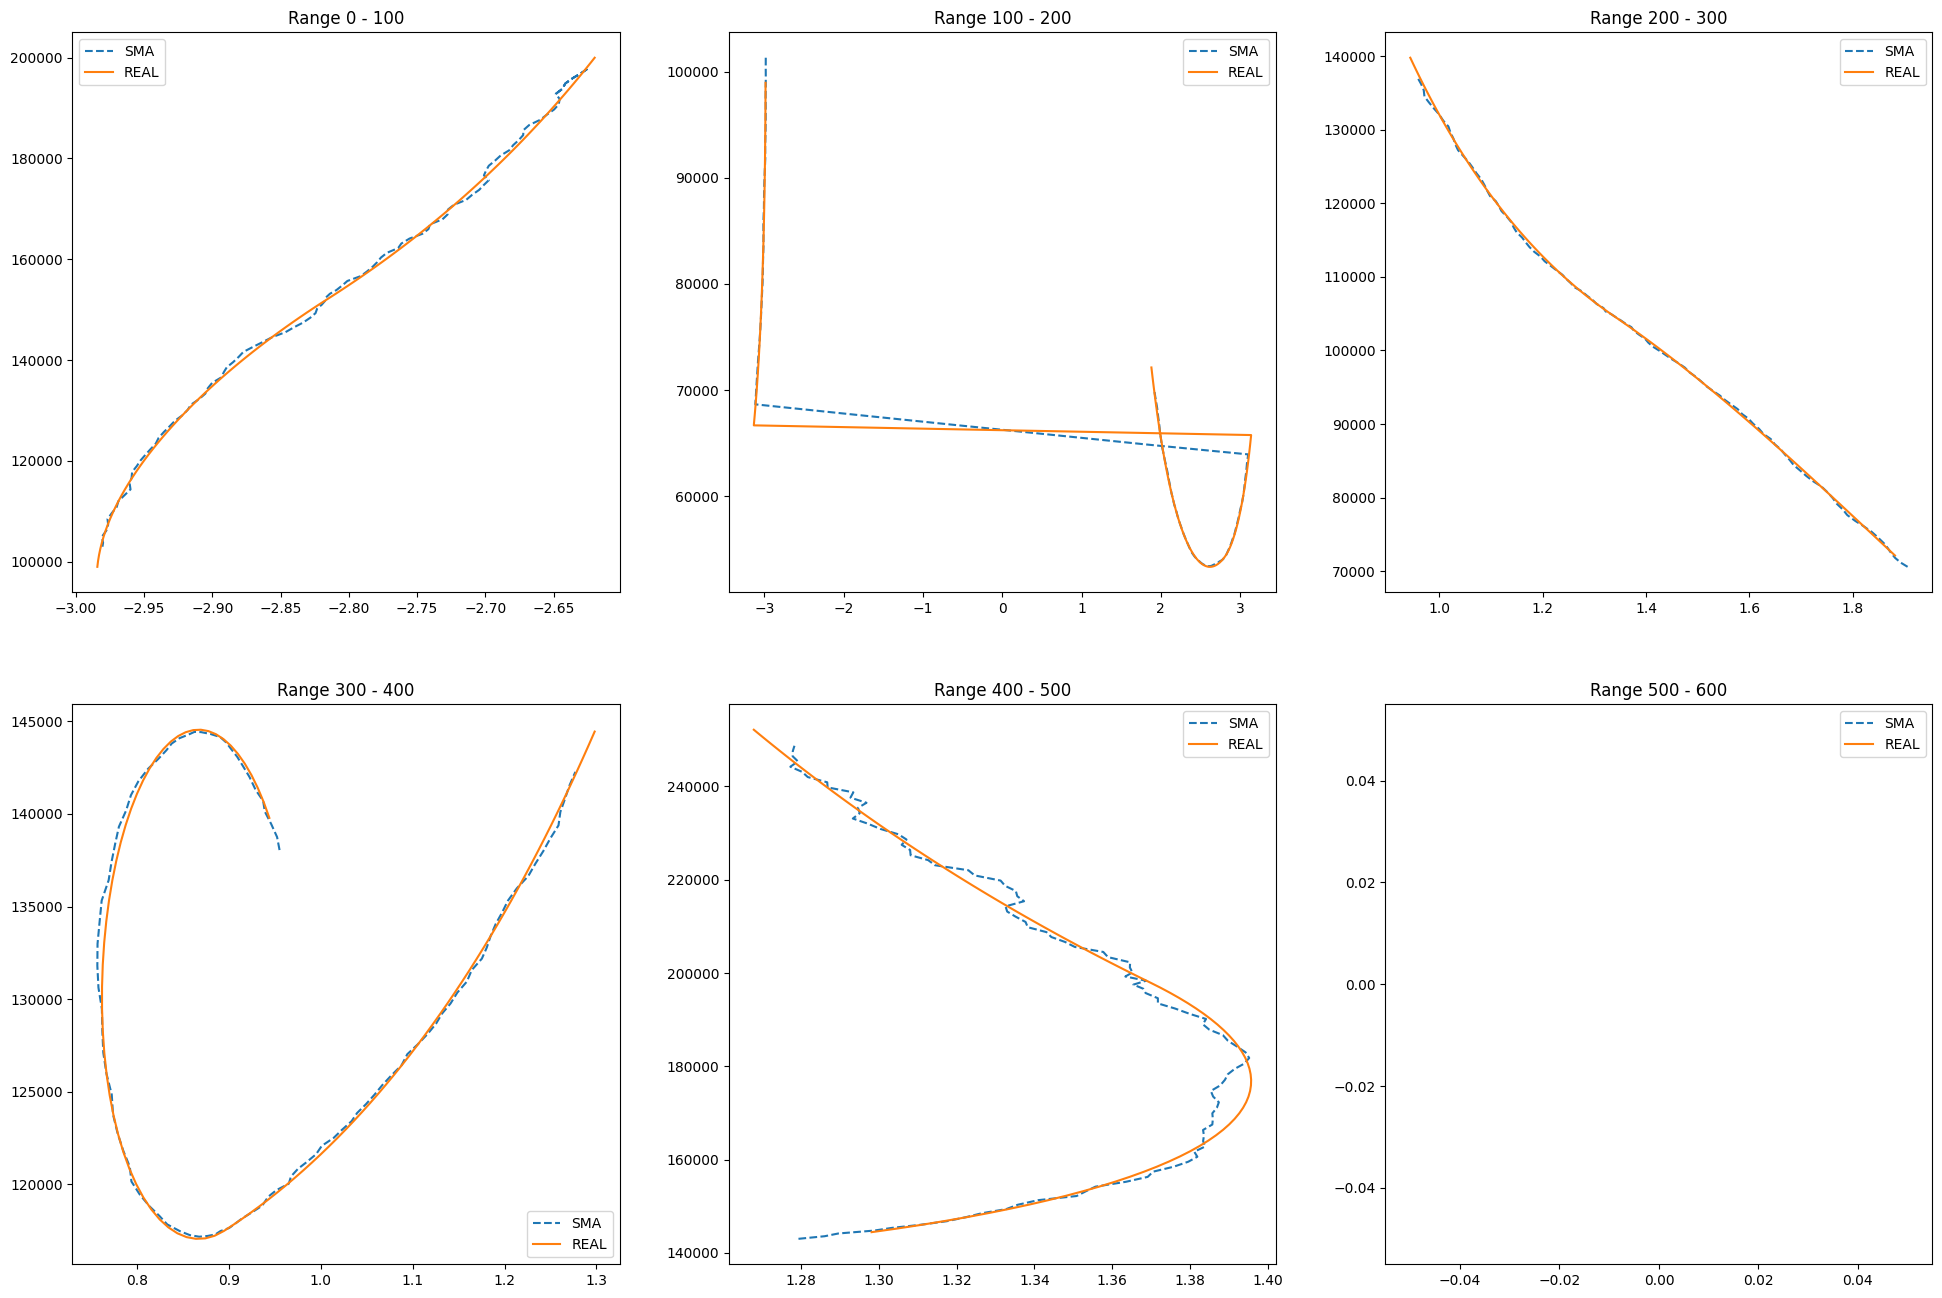

In [51]:
# Tìm kích thước cửa sổ phù hợp nhất
# m = find_best_window(azimuth_raw, azimuth_real)
# n = find_best_window(range_raw, range_real)
m = 5
n = 5
print(m, n)
# n_window = 2
# Sử dụng module SMA để xử lý dữ liệu nhiễu

# Tính trung bình phương vị
sma_azimuth = simple_moving_average(azimuth_raw, m)
sma_azimuth = np.nan_to_num(sma_azimuth, 0)
# Tính trung bình khoảng cách
sma_range = simple_moving_average(range_raw, n)
sma_range = np.nan_to_num(sma_range, 0)

# Do dữ liệu khi tính trung bình sẽ mất n giá trị đầu, nên ta sẽ lật ngược tập dữ liệu để tính
# Sau đó điền các giá trị bị thiếu bằng giá trị trung bình ngược

# Tính giá trị trung bình phương vị ngược
sma_azimuth_revert = simple_moving_average(np.flip(azimuth_raw, axis=0), m)
sma_azimuth_revert = np.nan_to_num(sma_azimuth_revert, 0)
sma_azimuth[:m] = sma_azimuth_revert[-m:] + sma_azimuth[:m]

# Tính giá trị trung bình khoảng cách ngược
sma_range_revert = simple_moving_average(np.flip(range_raw, axis=0), n)
sma_range_revert = np.nan_to_num(sma_range_revert, 0)
sma_range[:n] = sma_range_revert[-n:] + sma_range[:n]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

counter = 0
for j in range(2):
    for k in range(3):
            if counter > 5:
                  break
            k_start = counter * 100
            k_end = (counter+1) * 100
            # Hiển thị đồ thị
            axs[j][k].plot(sma_azimuth[k_start:k_end], sma_range[k_start:k_end], linestyle='--', label='SMA')
            axs[j][k].plot(azimuth_real[k_start:k_end], range_real[k_start:k_end], label='REAL')
            axs[j][k].set_title(f'Range {k_start} - {k_end}')
            axs[j][k].legend()
            counter += 1
plt.show()


In [ ]:
# Hiển thị giá trị min - max của tập ước lượng và tập thực
print("Evaluated:")
print('min:',np.min(sma_range), ', max:', np.max(sma_range))
print("Real:")
print('min:',np.min(range_real), ',max:', np.max(range_real))

Evaluated:
min: 53291.3384 , max: 250964.5457
Real:
min: 53350.50476 ,max: 252156.4507


In [ ]:
# Normalize data
scaler = MinMaxScaler()
sma_range_norm = scaler.fit_transform(sma_range.reshape(-1, 1))
sma_azimuth_norm = scaler.fit_transform(sma_azimuth.reshape(-1,1))
range_real_norm = scaler.fit_transform(range_real.reshape(-1,1))
azimuth_real_norm = scaler.fit_transform(azimuth_real.reshape(-1,1))

In [ ]:
# Compute the MSE

mse_range = mean_squared_error(range_real, sma_range)
mse_azimuth = mean_squared_error(azimuth_real, sma_azimuth)

print('MSE of range:', mse_range)
print('MSE of azimuth:', mse_azimuth)
print('----------------')
#Compute the RMSE

print('RMSE of range:', np.sqrt(mse_range))
print('RMSE of azimuth:', np.sqrt(mse_azimuth))

MSE of range: 755442.8676480612
MSE of azimuth: 0.07887399512015261
----------------
RMSE of range: 869.1621641834516
RMSE of azimuth: 0.28084514437702607


In [13]:
# Compute the MSE

r2_range = r2_score(range_real, sma_range)
r2_azimuth = r2_score(azimuth_real, sma_azimuth)

print('r2 of range:', r2_range)
print('r2 of azimuth:', r2_azimuth)
print('----------------')

r2 of range: 0.9652487675862688
r2 of azimuth: 0.8592387847751735
----------------


Sau khi dùng kỹ thuật SMA để xử lý dữ liệu RAW, ta thấy rõ sự thay đổi của dữ liệu. Sữ liệu sau khi được xử lý đã sát hơn với dữ liệu thực tế.

#### Weighted Moving Average

Kỹ thuật WMA (Weighted Moving Average) sẽ gán thêm trọng số vào các điểm dữ liệu trong quá khứ, sau đó tính tổng tập dữ liệu đó.  
  
$WMA = Value_1 * w_1 + Value_2 * w_2 + ... Value_n*w_n$  
  
Trong đó:  
N là thời gian trước đó  

Chú ý: Trọng số được gán cho dữ liệu được tính bằng: $w_i = \frac{i}{\sum_{i=1}^n i}$, với i là ngày thứ mấy trong tập ngày được chọn. (i = 1, 2,..., n)

n_window = 20


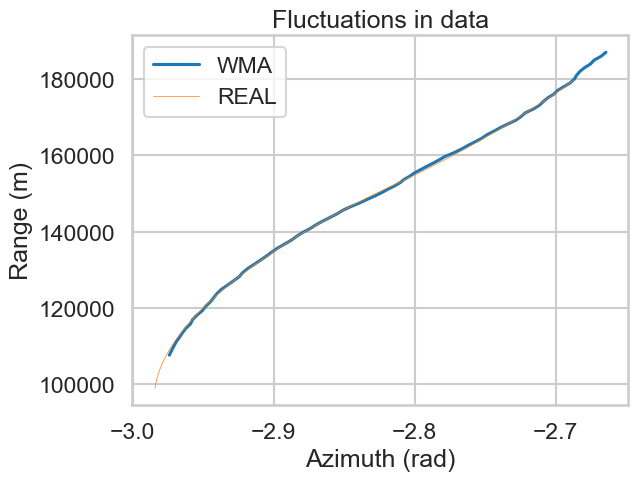

In [ ]:
# Sử dụng module wma để xử lý dữ liệu nhiễu
# n_window = find_best_window(azimuth_raw, range_raw, azimuth_real, range_real, f_type='wma')
n_window= 20
print('n_window =',n_window)
# Tính trung bình xuôi
wma_azimuth = weighted_moving_average(azimuth_raw, n_window)
wma_azimuth = np.nan_to_num(wma_azimuth, 0)
wma_range = weighted_moving_average(range_raw, n_window)
wma_range = np.nan_to_num(wma_range, 0)

#Tính trung bình ngược
wma_azimuth_inverse = weighted_moving_average(np.flip(azimuth_raw, axis = 0), n_window)
wma_azimuth_inverse = np.nan_to_num(wma_azimuth_inverse, 0)
wma_range_inverse = weighted_moving_average(np.flip(range_raw,axis=0), n_window)
wma_range_inverse = np.nan_to_num(wma_range_inverse, 0)

#
wma_azimuth[:n_window] = wma_azimuth_inverse[-n_window:] + wma_range[:n_window]
plt.plot(wma_azimuth[20:100], wma_range[20:100], label='WMA')
plt.plot(azimuth_real[20:100], range_real[20:100], label='REAL', lw=0.5)
plt.ylabel('Range (m)')
plt.xlabel('Azimuth (rad)')
plt.legend()
plt.title('Fluctuations in data')
plt.show()

In [ ]:
wma_azimuth = np.nan_to_num(wma_azimuth, 0)
Wma_range = np.nan_to_num(wma_range, 0)

In [ ]:
wma_azimuth, wma_range

(array([-2.71193168e+00, -2.70882524e+00, -2.70550060e+00, -2.70085615e+00,
        -2.69748395e+00, -2.69403583e+00, -2.69102206e+00, -2.68797138e+00,
        -2.68495095e+00, -2.68126473e+00, -2.67572703e+00, -2.67196162e+00,
        -2.66824533e+00, -2.66544436e+00, -2.66325619e+00, -2.66071622e+00,
        -2.65604869e+00, -2.65282867e+00, -2.64891400e+00, -2.64526947e+00,
        -2.66427886e+00, -2.66755206e+00, -2.67257024e+00, -2.67521195e+00,
        -2.67952695e+00, -2.68288369e+00, -2.68509427e+00, -2.68672235e+00,
        -2.68966139e+00, -2.69417830e+00, -2.69850531e+00, -2.70133265e+00,
        -2.70558872e+00, -2.70881745e+00, -2.71160868e+00, -2.71598328e+00,
        -2.72145526e+00, -2.72451712e+00, -2.72818248e+00, -2.73371427e+00,
        -2.73905708e+00, -2.74367765e+00, -2.74875885e+00, -2.75248852e+00,
        -2.75737426e+00, -2.76228921e+00, -2.76691119e+00, -2.77215491e+00,
        -2.77832084e+00, -2.78258167e+00, -2.78720750e+00, -2.79171667e+00,
        -2.7

In [ ]:
len(wma_azimuth), len(azimuth_raw)
print("Mean: ", np.mean(wma_azimuth )) # computes the mean of the wma_azimut
print("Median: ", np.median(wma_azimuth )) # computes the median of the wma_azimut
print("Min: ", np.min(wma_azimuth )) # computes the minimum value of the wma_azimut
print("Max: ", np.max(wma_azimuth )) # computes the maximum value of the wma_azimut
print("Standard deviation: ", np.std(wma_azimuth )) # computes the standard deviation of the wma_azimut
print("Variance: ", np.var(wma_azimuth )) # computes the variance of the 

Mean:  0.2800641399480096
Median:  1.153625114409524
Min:  -3.0776428786666665
Max:  2.930960955995238
Standard deviation:  1.9420206150732295
Variance:  3.771444069369405


In [ ]:
len(azimuth_real), len(azimuth_raw)
print("Mean: ", np.mean(azimuth_real )) # computes the mean of the wma_azimut
print("Median: ", np.median(azimuth_real )) # computes the median of the wma_azimut
print("Min: ", np.min(azimuth_real )) # computes the minimum value of the wma_azimut
print("Max: ", np.max(azimuth_real )) # computes the maximum value of the wma_azimut
print("Standard deviation: ", np.std(azimuth_real )) # computes the standard deviation of the wma_azimut
print("Variance: ", np.var(azimuth_real )) # computes the variance of the 

Mean:  0.339928412064
Median:  1.196306831
Min:  -3.132284698
Max:  3.139153558
Standard deviation:  1.9644331107734199
Variance:  3.8589974467029355


In [ ]:
# Compute the MSE

mse_range = mean_squared_error(range_real, wma_range)
mse_azimuth = mean_squared_error(azimuth_real, wma_azimuth)

print('MSE of range:', mse_range)
print('MSE of azimuth:', mse_azimuth)
print('-' * 20)
#Compute the RMSE

print('RMSE of range:', np.sqrt(mse_range))
print('RMSE of azimuth:', np.sqrt(mse_azimuth))

# Compute the MAE
mae_range = mean_absolute_error(range_real, wma_range)
mae_azimuth = mean_absolute_error(azimuth_real, wma_azimuth)

print('-' * 20)
print('MAE of range:', mae_range)
print('MAE of azimuth', mae_azimuth)

MSE of range: 1486090547.590426
MSE of azimuth: 0.35320831699122773
--------------------
RMSE of range: 38549.844974920794
RMSE of azimuth: 0.5943133155089391
--------------------
MAE of range: 13139.918782329523
MAE of azimuth 0.1382775285660286


#### Exponential Moving Average

Kỹ thuật EMA (Exponential Moving Average) cho trọng số vào các giá trị gần đây trong chuỗi thời gian để làm nó có thêm sự liên quan đến thông tin mới sau đó.   

Thì trước khi tính một EMA, ta cần tính một lượng giá trị SMA nhất định trước đó.  

Sau đó, ta sẽ nhân giá trị SMA đó với trọng số được gọi là "smoothing factor", tính bởi công thức:  

$sf = \frac{2}{d + 1}$  

Và cuối cùng, công thức tính tổng quát của EMA sẽ là:  

$EMA_t = (V_t * sf) + EMA_y * (1 -sf)$   

Trong đó:  
- $EMA_t$ = EMA hiện tại  
- $V_t$ = Giá trị thời điểm hiện tại  
- $EMA_y$ = EMA trước đó  
- d = Số thời gian trước đó
- sf = smoothing factor

In [ ]:
# Sử dụng module ema để xử lý dữ liệu nhiễu
n_window = 20

ema_azimuth = moving_average.exponential_moving_average(azimuth_raw, n_window)
ema_range = moving_average.exponential_moving_average(range_raw, n_window)
plt.plot(ema_azimuth[20:100], ema_range[20:100], label='EMA')
plt.plot(azimuth_real[20:100], range_real[20:100], label='REAL', lw=0.5)
plt.legend()
plt.title('Fluctuations in data')
plt.show()

NameError: name 'moving_average' is not defined

In [ ]:
ema_azimuth = np.nan_to_num(ema_azimuth, 0)

In [ ]:
len(ema_azimuth), len(azimuth_raw)
print("Mean: ", np.mean(ema_azimuth )) # computes the mean of the ema_azimut
print("Median: ", np.median(ema_azimuth )) # computes the median of the ema_azimut
print("Min: ", np.min(ema_azimuth )) # computes the minimum value of the ema_azimut
print("Max: ", np.max(ema_azimuth )) # computes the maximum value of the ema_azimut
print("Standard deviation: ", np.std(ema_azimuth )) # computes the standard deviation of the ema_azimut
print("Variance: ", np.var(ema_azimuth )) # computes the variance of the 

In [ ]:
len(azimuth_real), len(azimuth_raw)
print("Mean: ", np.mean(azimuth_real )) # computes the mean of the wma_azimut
print("Median: ", np.median(azimuth_real )) # computes the median of the wma_azimut
print("Min: ", np.min(azimuth_real )) # computes the minimum value of the wma_azimut
print("Max: ", np.max(azimuth_real )) # computes the maximum value of the wma_azimut
print("Standard deviation: ", np.std(azimuth_real )) # computes the standard deviation of the wma_azimut
print("Variance: ", np.var(azimuth_real )) # computes the variance of the 

#### So sánh các kỹ thuật MA (Moving Average)

Sự khác nhau giữa SMA vs WMA:
- SMA chỉ đơn giản là tính trung bình của các điểm dữ liệu trong bộ, và trọng số được gán bằng nhau cho tất cả các quan sát của mẫu.  
- Trong khi đó, WMA sẽ gán một trọng số nhất định cho từng quan sát, với mỗi quan sát gần đây nhất sẽ được gán trọng số lớn hơn các quan sát trước đó. Việc này để thể hiện rõ sự tác động của các quan sát gần đây nhất với giá trị hiện tại


Sự khác nhau giữa SMA và EMA:  
- SMA tương đối chậm trong phản ứng vì nó tính toán trung bình của các giá trị trong một khoảng thời gian dài hơn, và không nhấn mạnh các giá trị gần đây.  
- Trong khi đó EMA phản ứng nhanh với sự thay đổi trong dữ liệu, vì các giá trị gần đây được đánh giá cao hơn trong quá trình tính toán từ đó ảnh hưởng đến kết quả. 

In [ ]:
# Sử dụng module ema để xử lý dữ liệu nhiễu
n_window = 20
range_n = 50
ema_azimuth = moving_average.exponential_moving_average(azimuth_raw, n_window)
ema_range = moving_average.exponential_moving_average(range_raw, n_window)
plt.plot(ema_azimuth[20:range_n], ema_range[20:range_n], label='EMA', lw=0.8)
plt.plot(wma_azimuth[20:range_n], wma_range[20:range_n], label='wma', lw=0.8)
plt.plot(sma_azimuth[20:range_n], sma_range[20:range_n], label='sma', lw=0.8)
plt.plot(azimuth_real[20:range_n], range_real[20:range_n], label='REAL', lw=0.8)
plt.legend()
plt.title('Fluctuations in data')
plt.show()

In [ ]:
azimuth_real, np.flip(azimuth_real, axis=0)

In [ ]:
n = 20
sma_azimuth = moving_average.simple_moving_average(azimuth_raw, 20)
sma_azimuth = np.nan_to_num(sma_azimuth, 0)
def simple_moving_average_revert(data, n):
    data_revert = np.flip(data, axis=0)
    temp_data = np.full(len(data), np.nan)
    for i in range(n, len(data)):
        sma = sum(data_revert[i - n:i]) / n 
        temp_data[i] = sma
    return temp_data
sma_azimuth_revert = simple_moving_average_revert(azimuth_raw, n)
sma_azimuth_revert = np.nan_to_num(sma_azimuth_revert, 0)
sma_azimuth[:n] = sma_azimuth_revert[-n:] + sma_azimuth[:n]
sma_azimuth

In [ ]:
sma_azimuth

In [ ]:
sma_azimuth_revert

In [ ]:
azimuth_real.tolist()